<a href="https://colab.research.google.com/github/iqbalkp/TugasSiscer/blob/main/TugasSiscerKelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Wine Quality Classification Using Random Forest Algorithm
<center>

**Kelompok 3**

| No. | Nama |
|:-----:|:-----:|
|1|Mohammad Ariel Chandra Wibowo|
|2|Muhammad Rafli Al-Hasyimi|
|3|Muhammad Dafa Maulana|
|4|Endang Rusiana|
|5|Tia Fiendi A.|
|6|Iqbal Kurniawan P|

</center>

# Import Library

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
# downloaded from https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
path = 'WineQT.csv'
data = pd.read_csv(path)
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


# Modify Dataset

**Set Quality Threshold**

In [5]:
# Create a new target variable for classification (binary classification example: quality >= 7 is good)
data['quality_class'] = np.where(data['quality'] >= 7, 1, 0)

**Drop unused data**

In [6]:
# Drop unnecessary columns
data = data.drop(['quality', 'Id'], axis=1)

# Dataset Preview

**Dataset Head**

In [7]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


**Data Composition of Quality Class**

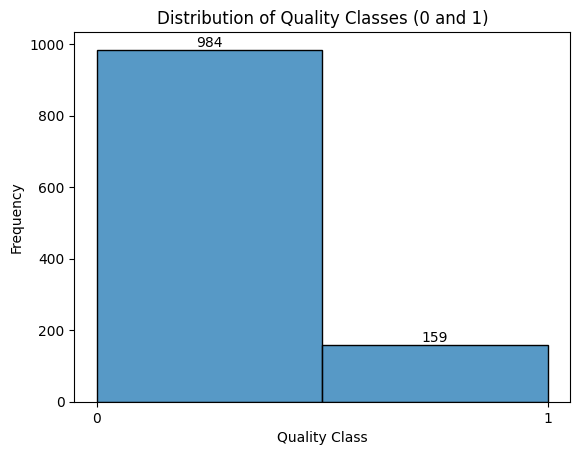

In [8]:
# Create the histogram
ax = sns.histplot(data['quality_class'], bins=[0, 0.25, 0.75, 1], binwidth=0.5)

# Add labels and title
plt.xlabel('Quality Class')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Classes (0 and 1)')
plt.xticks([0, 1])
# Add count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

# Dataset Balancing

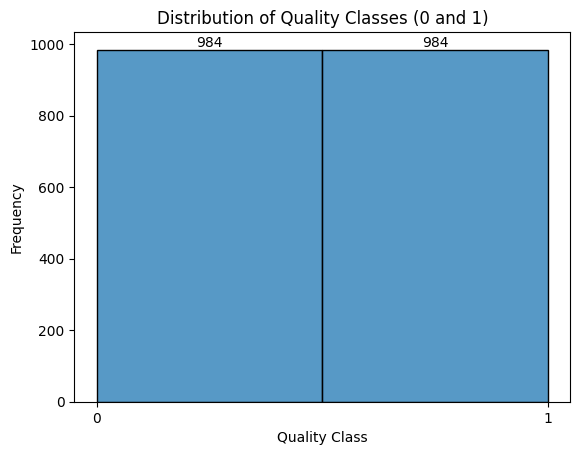

In [9]:
from sklearn.utils import resample
# Assuming 'quality_label' is the column containing the class labels

# Separate majority and minority classes
data_majority = data[data['quality_class'] == 0]
data_minority = data[data['quality_class'] == 1]

data_minority_upsampled = resample(data_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Create the histogram
ax = sns.histplot(data_upsampled['quality_class'], bins=[0, 0.25, 0.75, 1], binwidth=0.5)

# Add labels and title
plt.xlabel('Quality Class')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Classes (0 and 1)')
plt.xticks([0, 1])
# Add count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

In [10]:
data_upsampled.sample(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
769,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,1
553,9.4,0.685,0.26,2.4,0.082,23.0,143.0,0.99780,3.28,0.55,9.4,0
429,8.8,0.480,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5,0
219,8.4,0.650,0.60,2.1,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,0
1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,1
198,8.9,0.400,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,1
99,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,0
68,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.99670,3.39,0.56,9.8,0
487,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,0
565,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,0


# Split data for Validation and Test

**50% training, 25% Validation, and 25% Testing**

In [11]:
# Define feature variables and target variable
X = data_upsampled.drop(['quality_class'], axis=1)
y = data_upsampled['quality_class']

# Split the dataset
# Data for training and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
# Data for testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Training and Validation Random Forest

**Scaler**

Standardizing the feature variables is a common preprocessing step in machine learning pipelines, especially for algorithms that are sensitive to the scale of input features, such as Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and neural networks.

However, after applying the StandardScaler, the data is transformed such that each feature has a mean of 0 and a standard deviation of 1, which helps in better training of machine learning models, especially those that are sensitive to the scale of input features.

In [12]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

**Training and Validation**

Accuracy: 0.9410569105691057
Precision: 0.9015748031496063
Recall: 0.9828326180257511
F1 Score: 0.9404517453798767
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       259
           1       0.90      0.98      0.94       233

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



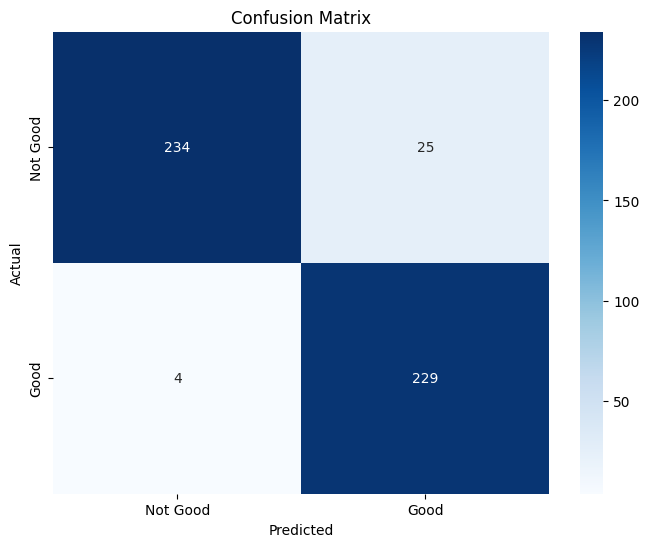

Feature Importances:
alcohol                 0.216235
sulphates               0.162863
volatile acidity        0.111352
citric acid             0.098687
total sulfur dioxide    0.073325
density                 0.070572
chlorides               0.062771
fixed acidity           0.057001
pH                      0.055390
residual sugar          0.049404
free sulfur dioxide     0.042401
dtype: float64


In [13]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
important_features = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(important_features)


# Random Forest Architecture

**Install required library**

In [14]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


**Number of trees**

In [15]:
from sklearn.tree import export_graphviz
import graphviz

# Get the number of trees in the Random Forest
num_trees = len(rf_classifier.estimators_)
print(f"The Random Forest model has {num_trees} trees.")


The Random Forest model has 100 trees.


**Draw Single Tree From Random Forest**: 1st tree from 100 trees

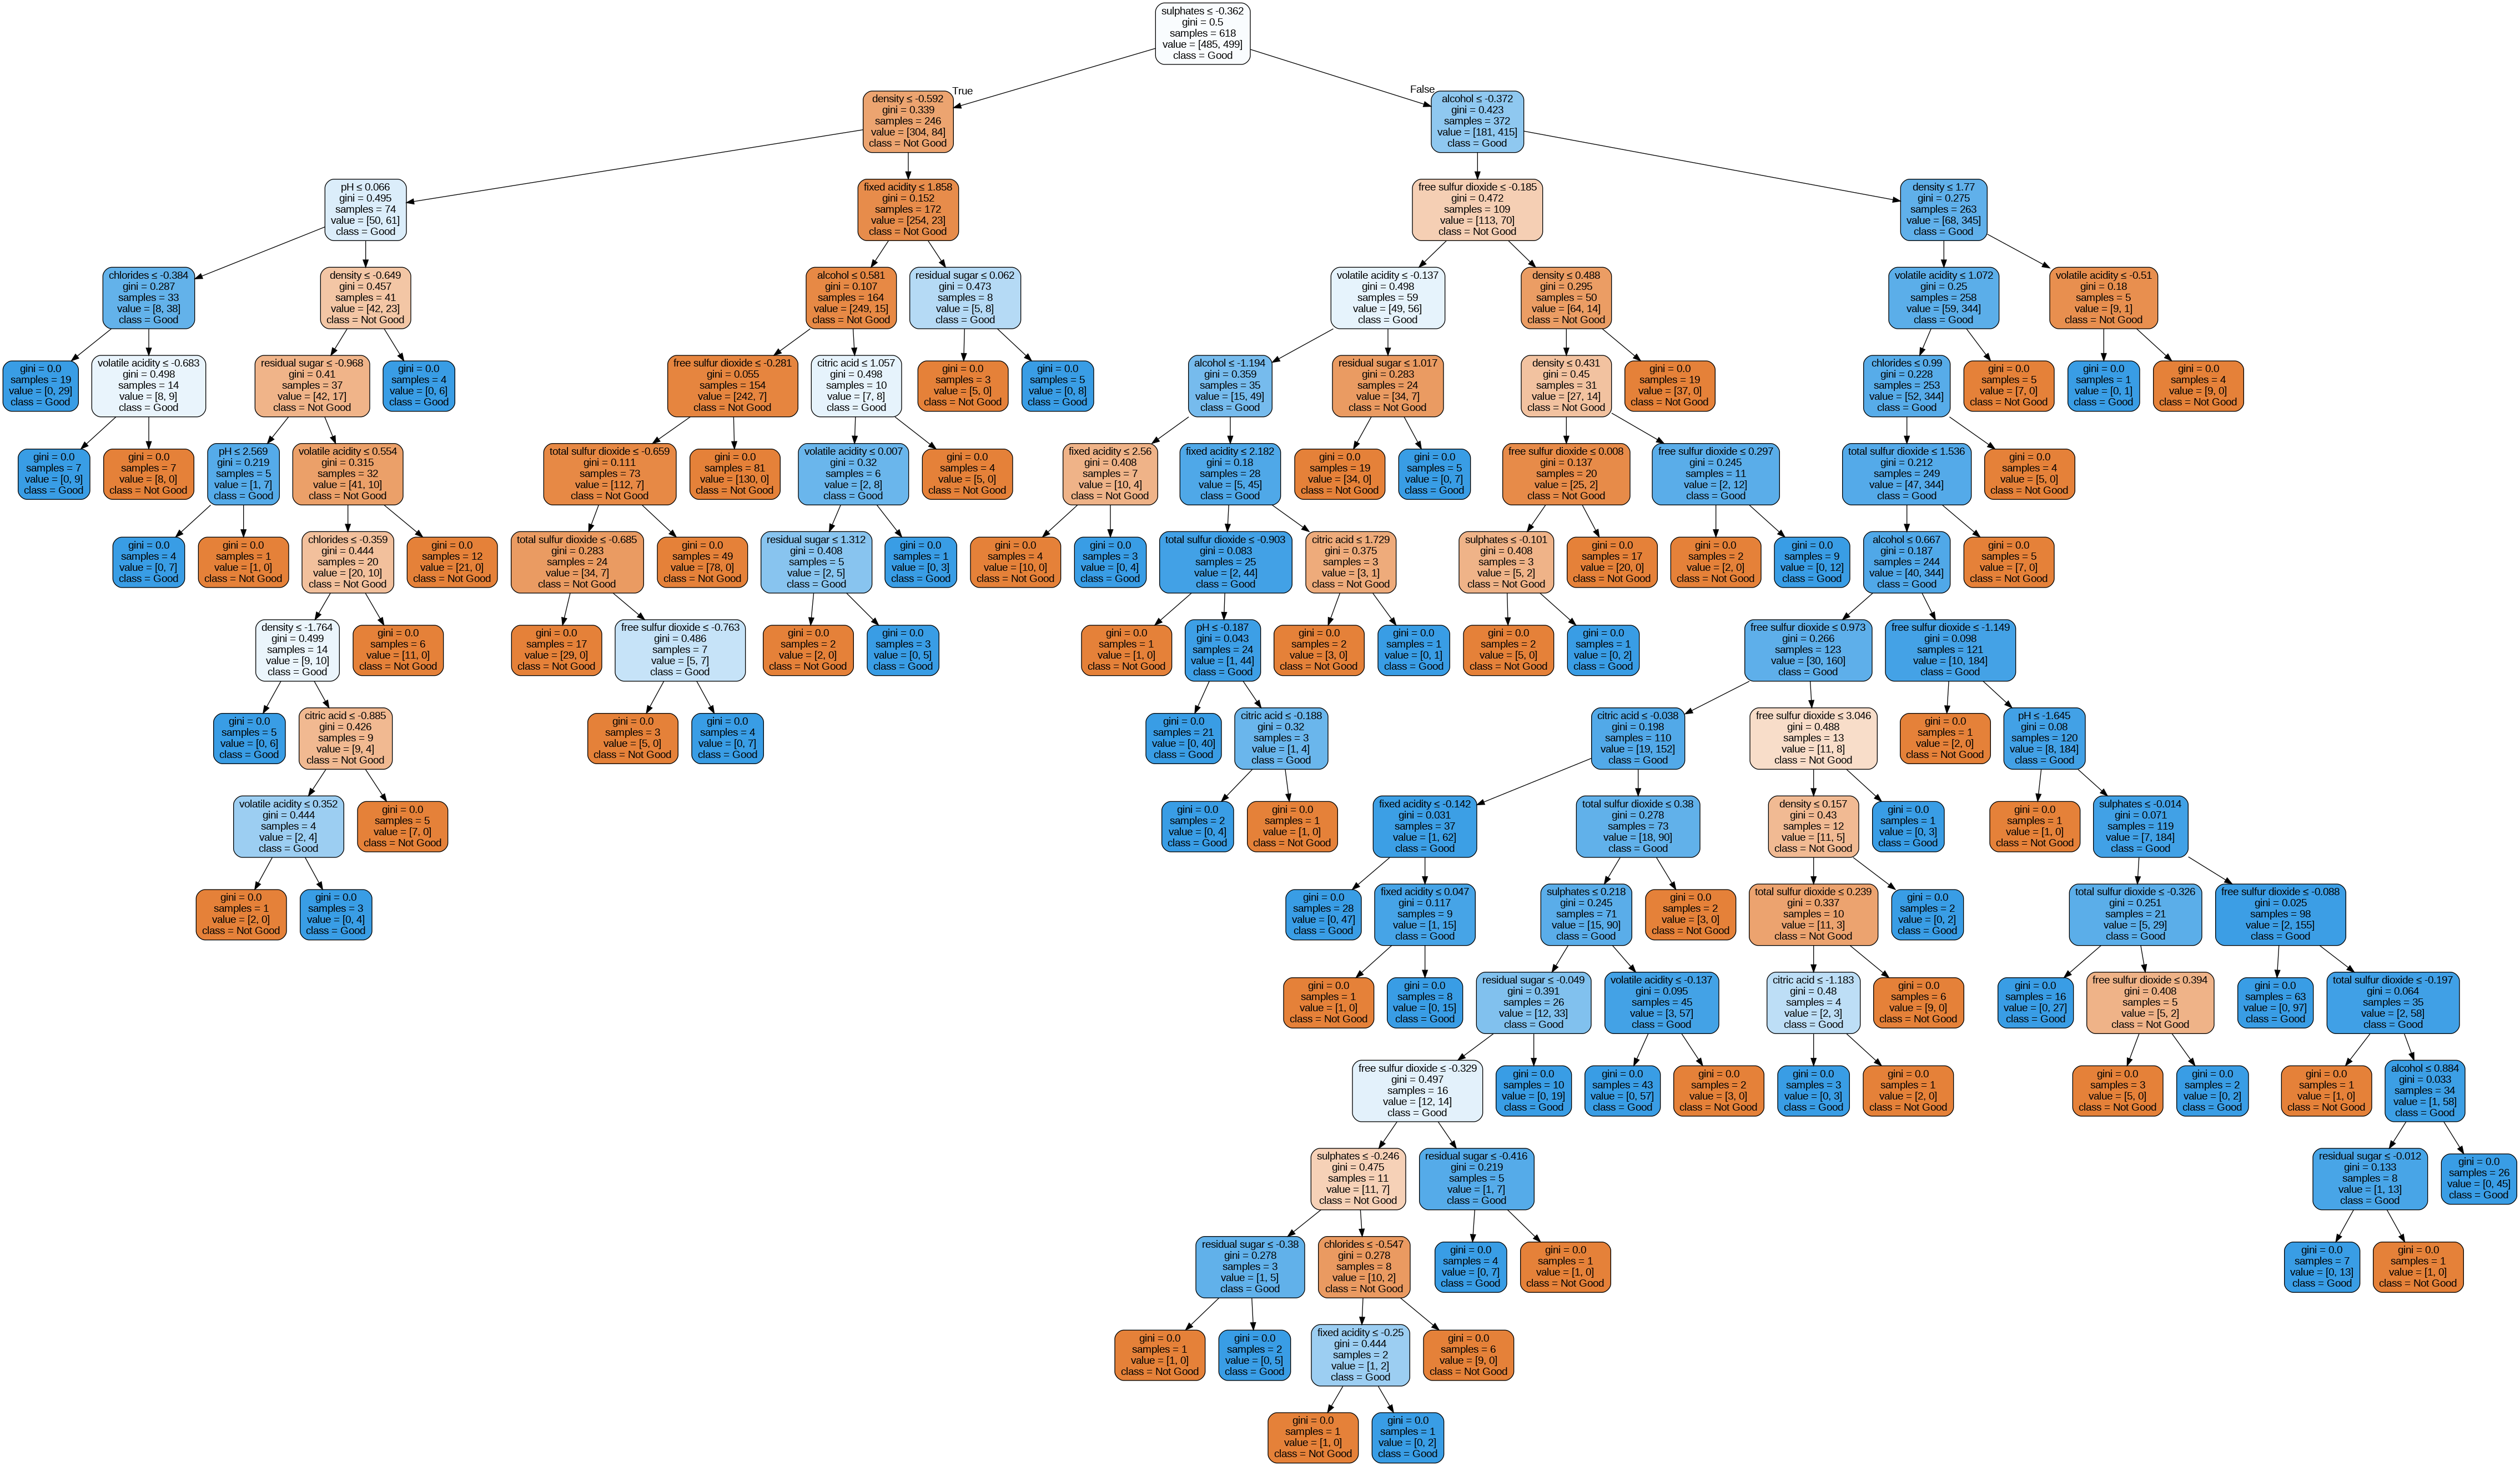

In [16]:
# Extract a single tree from the Random Forest
estimator = rf_classifier.estimators_[0] # 0:first tree model

# Export the tree to a dot file
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=data.drop(['quality_class'], axis=1).columns,
                           class_names=['Not Good', 'Good'],
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the dot file to a graph
graph = graphviz.Source(dot_data)

# Render the graph to a PNG file
graph.render("random_forest_tree_1st", format='png')

# Display the PNG image in Colab
from IPython.display import Image
Image(filename='random_forest_tree_1st.png')

**Draw Single Tree From Random Forest**: 50th tree from 100 trees

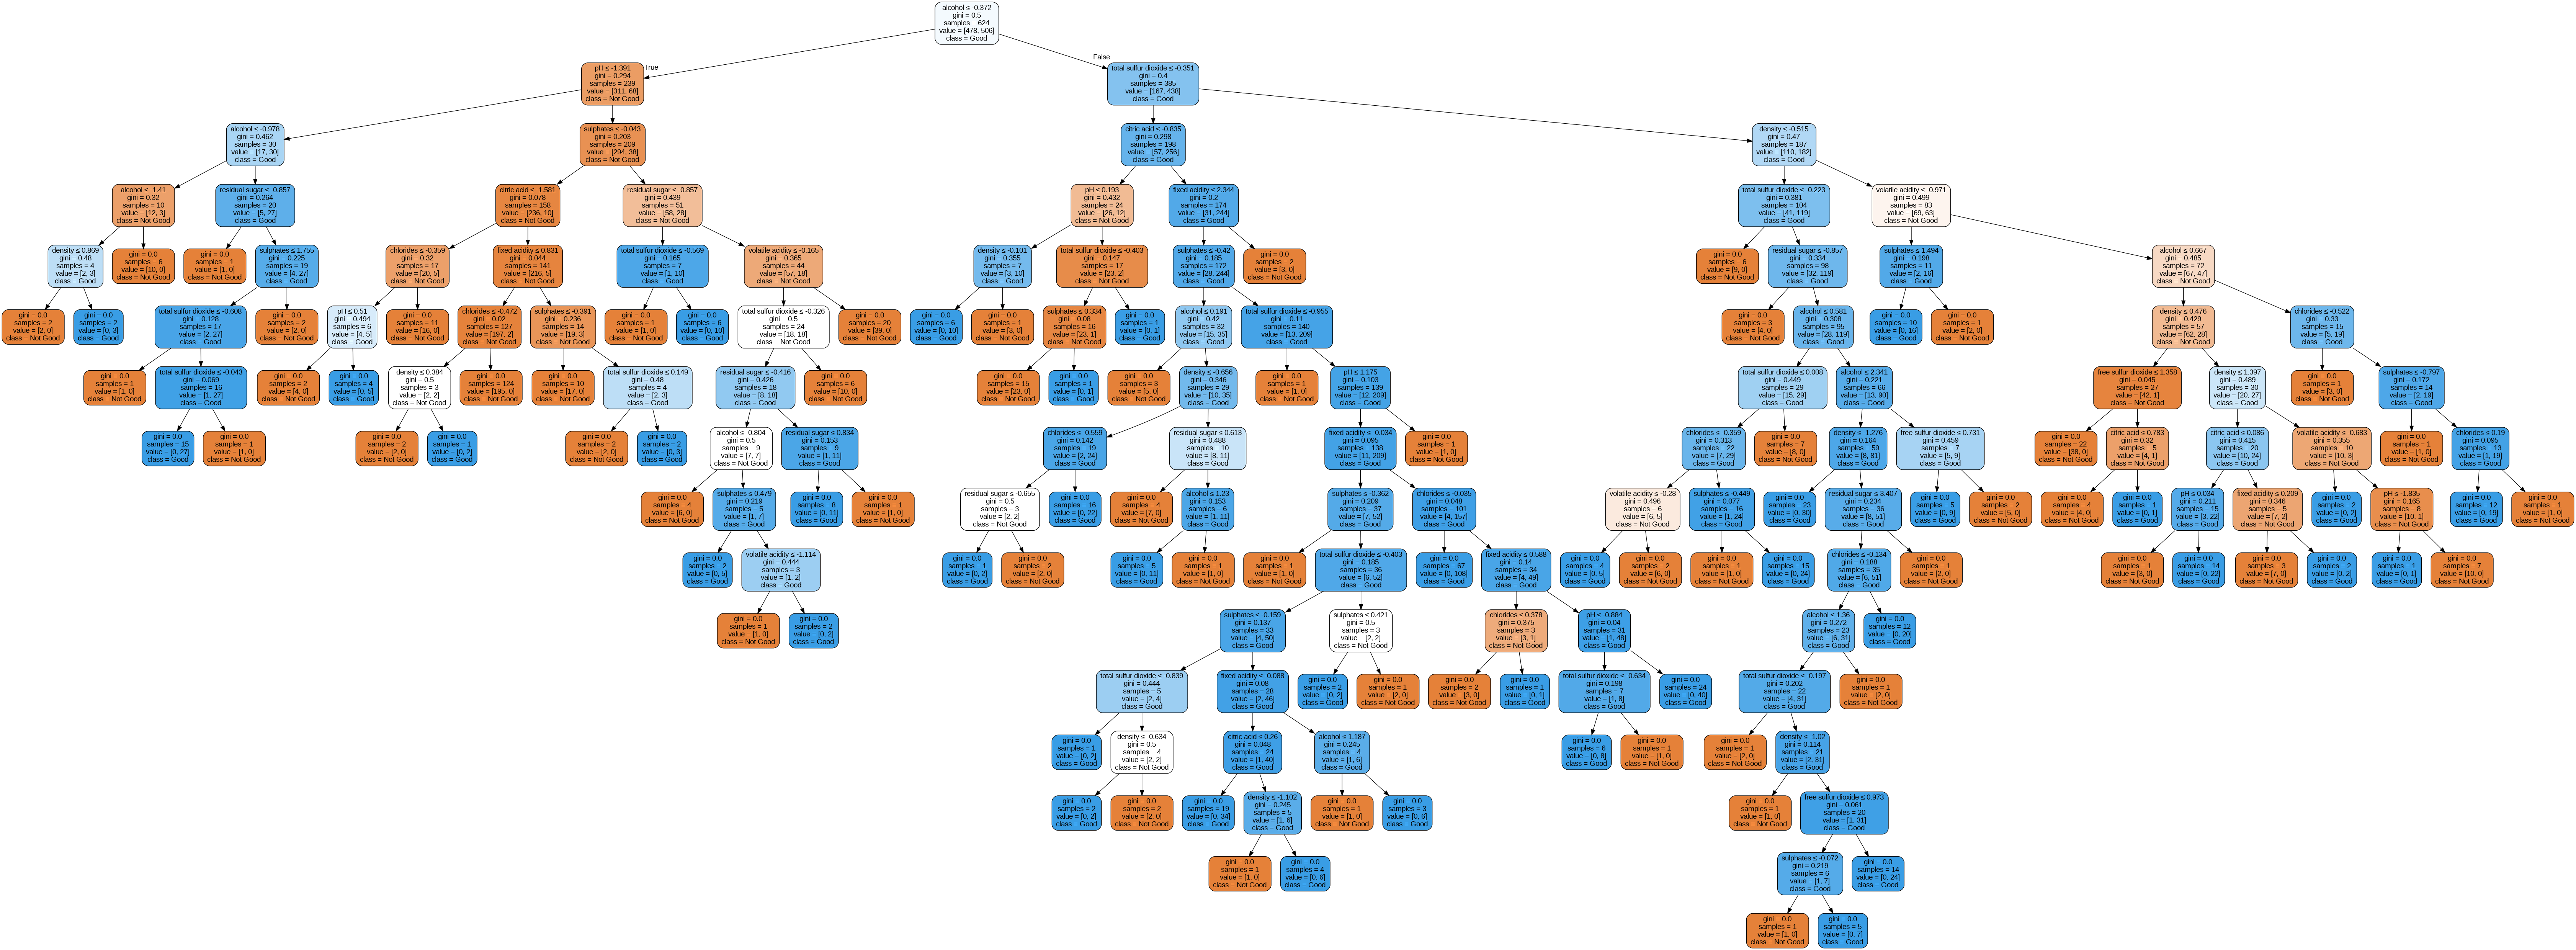

In [17]:
# Extract a single tree from the Random Forest
estimator = rf_classifier.estimators_[49]

# Export the tree to a dot file
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=data.drop(['quality_class'], axis=1).columns,
                           class_names=['Not Good', 'Good'],
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the dot file to a graph
graph = graphviz.Source(dot_data)

# Render the graph to a PNG file
graph.render("random_forest_tree_50th", format='png')

# Display the PNG image in Colab
from IPython.display import Image
Image(filename='random_forest_tree_50th.png')

# Testing Random Forest

**Scaler**

In [18]:
# Standardize the feature variables
X_test = scaler.transform(X_test)

**Testing**

Accuracy Test: 0.9369918699186992
Precision Test: 0.8888888888888888
Recall Test: 1.0
F1 Score Test: 0.9411764705882353
Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       244
           1       0.89      1.00      0.94       248

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



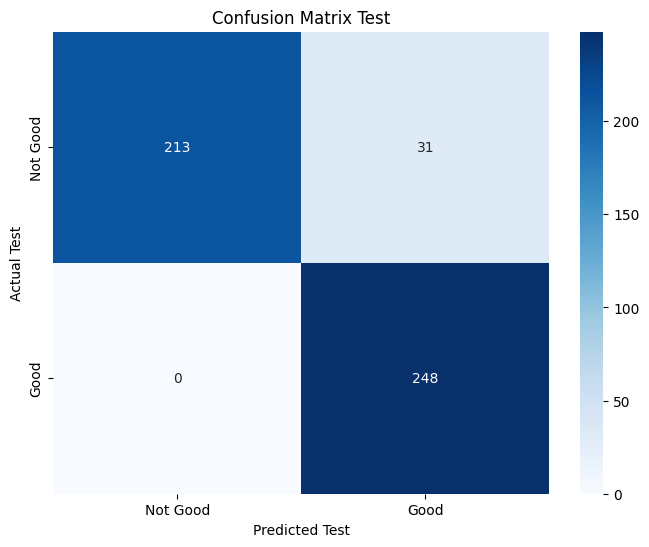

Feature Importances:
alcohol                 0.216235
sulphates               0.162863
volatile acidity        0.111352
citric acid             0.098687
total sulfur dioxide    0.073325
density                 0.070572
chlorides               0.062771
fixed acidity           0.057001
pH                      0.055390
residual sugar          0.049404
free sulfur dioxide     0.042401
dtype: float64


In [19]:
# Make predictions
y_pred_test = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy Test:", accuracy_test)
print("Precision Test:", precision_test)
print("Recall Test:", recall_test)
print("F1 Score Test:", f1_test)

# Print the classification report
print("Classification Report Test:")
print(classification_report(y_test, y_pred_test))

# Compute the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel('Predicted Test')
plt.ylabel('Actual Test')
plt.title('Confusion Matrix Test')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
important_features = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(important_features)


**Evaluation**/**Test**

Jumlah Gambar Uji: 360


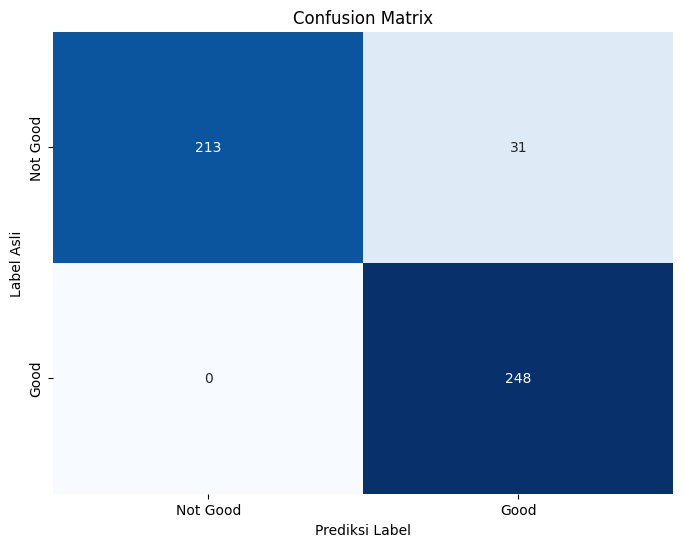

Akurasi: 0.9722222222222222
Sensitivitas: 1.0
Spesifisitas: 1.0
F1 Score: 0.9722290797927471


In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
x = digits.data  # fitur
y = digits.target  # label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

true_negatives = cm[0, 0]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]
false_positives = cm[0, 1]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Jumlah Gambar Uji:", len(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel('Prediksi Label')
plt.ylabel('Label Asli')
plt.title('Confusion Matrix')
plt.show()

print("Akurasi:", accuracy)
print("Sensitivitas:", sensitivity)
print("Spesifisitas:", specificity)
print("F1 Score:", f1)


- 0 data asli good dan diprediksi oleh komputer 0 not good = false negative
- 248 good dan dan diprediksi oleh komputer 248 good = true positive
- 213 data asli not good dan diprediksi oleh komputer 213 not good = true negative
- 31 data asli not good dan diprediksi oleh komputer 31 good = false posite

Pada gambar di atas, kita dapat melihat bahwa sebagian besar prediksi berada di sepanjang diagonal utama dari kiri atas ke kanan bawah. Ini menunjukkan bahwa model dengan baik membedakan antara kelas positif dan negatif. Jumlah false positive (FP) dan false negative (FN) sangat rendah, dan sebagian besar sampel diklasifikasikan dengan benar.

Contoh ini mencerminkan situasi di mana model memiliki tingkat akurasi yang tinggi, sensitivitas yang baik, dan spesifisitas yang tinggi. Model ini secara efektif mengidentifikasi baik kelas positif maupun kelas negatif, sehingga dapat dianggap sebagai contoh confusion matrix yang bagus.